# COVID-19 India Dashboard (Live)
**Data Source**: API from covid19india.org

Minimal view of the daily COVID-19 cases in India in the last 100 days

In [2]:
from datetime import datetime

import pandas as pd
import numpy as np

# For making web-requests to the website
import requests
import json

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
%matplotlib inline

from IPython.core.display import display,HTML

latest_df = pd.read_csv("https://api.covid19india.org/csv/latest/state_wise_daily.csv")
# print(latest_df.head())

# Confirmed Cases
df_confirmed = latest_df[(latest_df.Status == "Confirmed")]
df_confirmed = df_confirmed.drop(columns = ["Status"])

# Deaths
df_death = latest_df[(latest_df.Status == "Deceased")]
df_death = df_death.drop(columns = ["Status"])

df_confirmed["Date"] = df_confirmed["Date"].astype('datetime64[ns]')
# print(df_confirmed.head())

# Latest date
update = latest_df.iloc[-1,0]

# Total confirmed cases
cases = df_confirmed.TT.sum()

# Daily new cases
new_cases = df_confirmed.iloc[-1,2]

# Total deaths
deaths = df_death.TT.sum()

# Daily new deaths
new_deaths = df_death.iloc[-1,2]

# Last Updated at
c_time = datetime.now().time() # time object

# Display in HTML
overview = '''
<!-- #######  HTML!! #########-->
<h1 style="color: #ff8c00; text-align: center;">India COVID-19 Status</h1>
<p style="text-align: center;">Last update: <strong>{update}</strong></p>
<p style="color: #000080; text-align: center;"><strong>Confirmed cases:</strong></p>
<p style="text-align: center;font-size:24px;">{cases} (<span style="color: #ff0000;">+{new_cases}</span>)</p>
<p style="color: #006400; text-align: center;"><strong>Confirmed deaths:</strong></p>
<p style="text-align: center;font-size:24px;">{deaths} (<span style="color: #ff0000;">+{new_deaths}</span>)</p>
<p style="text-align: center;"><i>Last Updated: {c_time}<i></p>
'''

html = HTML(overview.format(update=update,cases=cases,new_cases=new_cases,deaths=deaths,new_deaths=new_deaths,c_time=c_time))
display(html)

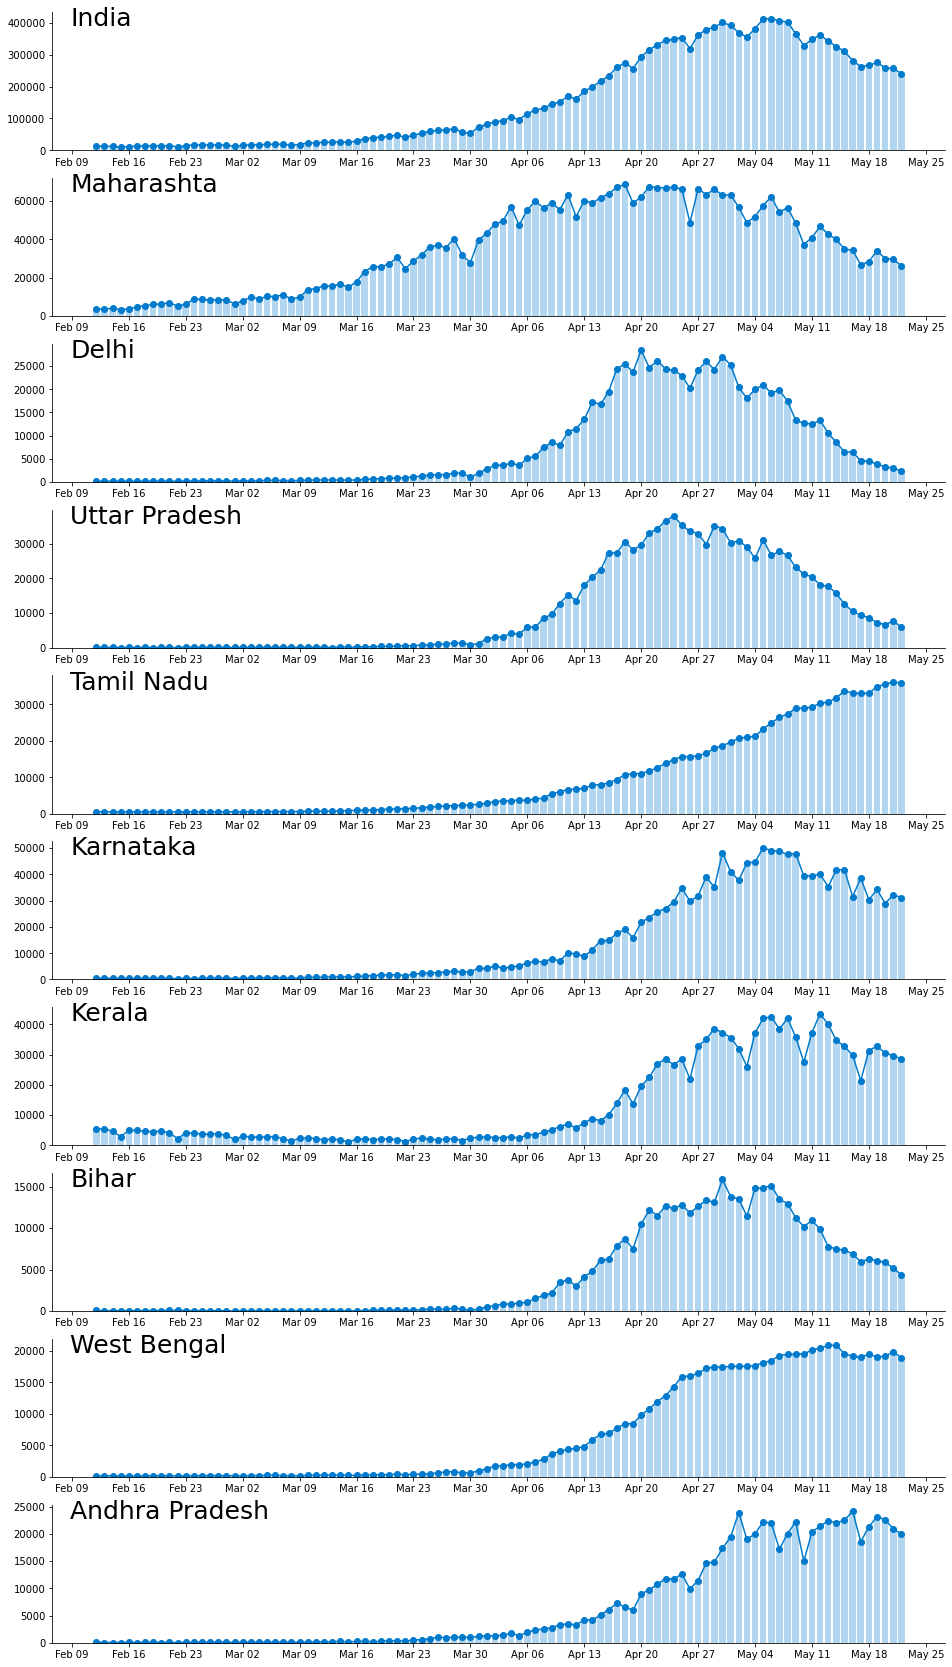

In [3]:
#collapse

# For 10 states
n = 10

st = ["TT", "MH", "DL", "UP", "TN", "KA", "KL", "BR", "WB", "AP"]
state_name = ["India", "Maharashta", "Delhi", "Uttar Pradesh", "Tamil Nadu", "Karnataka", "Kerala", "Bihar", "West Bengal", "Andhra Pradesh"]

fig = plt.figure(figsize = (16,30))
gridspec = fig.add_gridspec(n, 3)

size = df_confirmed.shape[0]
df_confirmed.set_index(pd.Index(list(range(size))), inplace = True)

# Displaying the latest 100 days info
df_100 = df_confirmed.loc[size-100:size]

for i in range(n):
    ax = fig.add_subplot(gridspec[i, :])
    ax.bar(df_100.Date,df_100[st[i]],alpha=0.3,color='#007acc')
    ax.plot(df_100.Date,df_100[st[i]],marker="o",color='#007acc')
    ax.xaxis.set_major_locator(mdates.WeekdayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax.text(0.02, 0.9,state_name[i], transform = ax.transAxes, fontsize=25)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

### References
- COVID19-India [API](https://api.covid19india.org)
- fast.ai and univ.ai Blogs

##### Made with 🤍 by [Minimal Cave](https://minimalcave.com)